In [1]:
# Setup the environment

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm
from utils import MealyMachine

# if using a Jupyter notebook, include:
%matplotlib inline

In [2]:
fname = 'default'
tls_df = pd.read_table('./'+fname+'.tab')
mm = MealyMachine('./'+fname+'.dot')
tls_df.Duration = tls_df.Duration / 1e+9
tls_df['Origin'] = mm.list_origin(tls_df.Input.to_list())
tls_df['Destination'] = mm.list_destination(tls_df.Input.to_list())
tls_df.head()

,ResetId,SymbolId,OpType,Duration,Input,Output,Origin,Destination
0,0,-1,Reset,0.001249,Reset,Reset,s0,s0
1,0,0,TimedIO,0.100799,ClientHelloRSA,HandshakeServerHelloTLSv12HandshakeCertificate...,s0,s1
2,1,-1,Reset,0.001024,Reset,Reset,s1,s0
3,1,0,TimedIO,0.112066,ClientHelloDHE,HandshakeServerHelloTLSv12HandshakeCertificate...,s0,s1
4,2,-1,Reset,0.000935,Reset,Reset,s1,s0


In [3]:
# Concatenate IO

tls_df["IO"] = tls_df["Input"]+" / "+tls_df["Output"]
tls_df["SI"] = tls_df["Input"]+" - "+tls_df["Origin"]

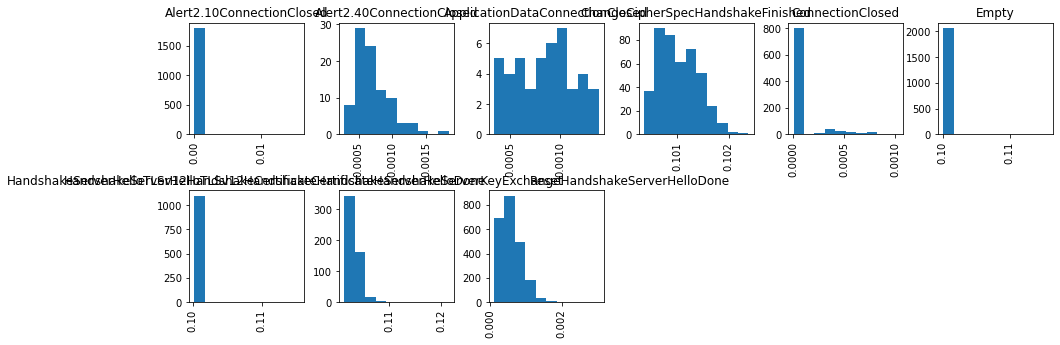

In [4]:
x = tls_df['Duration'].hist(by=tls_df['Output'],figsize=(15,30), layout=(10,6))